In [204]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np

tf.__version__

'2.18.0'

In [205]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train.shape


(60000, 28, 28)

In [206]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [207]:
class_name = ["t-shirt", "trouser", "pullover", "dress", "coat", "sandal","shirt", "sneaker", "bag", "ankle boot"]

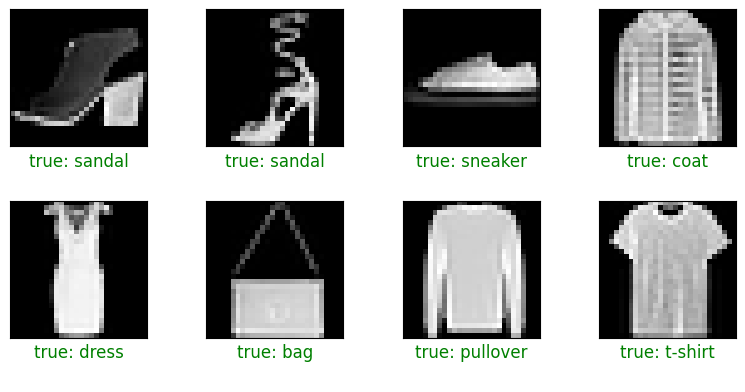

In [208]:
import random
def plot_data(X, y, y_prob = None):
    n_row, n_col = 2, 4
    fig, axes = plt.subplots(n_row, n_col, figsize = (8, 4))
    len_x = X.shape[0]
    for i in range(n_row * n_col):
        ax  = axes[i // n_col,  i % n_col]
        idx = random.randint(0, len_x)
        img = X[idx]
        true_label = class_name[y[idx]]
        label = f"true: {true_label}\n"
        color =  "green"
        if y_prob is not None:
            pred_label = class_name[np.argmax(y_prob[idx])]
            label += f"predict: {pred_label}"
            if pred_label != class_name[y[idx]]: color = "red"

        ax.imshow(img, cmap="gray")
        ax.set_xlabel(label, color = color, fontsize = 12)
        ax.set(xticks = [], yticks = [])
    plt.tight_layout()
    plt.show()
plot_data(X_train, y_train)


In [209]:
# scale pixel  to [0, 1]
X_train  = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32) / 255

# expand (60000, 28, 28)  to  (60000, 28, 28, 1)
X_train  = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test,  - 1)

X_train.shape

(60000, 28, 28, 1)

In [210]:
# convert class vectors to binary class matrices: 1 => [0 1 0 0 ...]
# 1              => sparse_categorical_cross_entropy
# [0 1 0 0 ...]  => categorical_cross_entropy

y_train_label = keras.utils.to_categorical(y_train, len(class_name))
y_test_label = keras.utils.to_categorical(y_test, len(class_name))
print(y_train[0], y_train_label[0])
y_train_label.shape

9 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


(60000, 10)

In [211]:
model = tf.keras.Sequential([
    keras.layers.Input(shape = [28, 28]),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation = "relu"),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")

])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [212]:
model.layers

[<Flatten name=flatten_9, built=True>,
 <Dense name=dense_20, built=True>,
 <Dense name=dense_21, built=True>,
 <Dense name=dense_22, built=True>,
 <Dense name=dense_23, built=True>]

In [213]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)

model.compile(loss= "categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

In [214]:
epochs  = 30
batch_size = 128
# train model
history  = model.fit(X_train, y_train_label, epochs= epochs, batch_size = batch_size, validation_split = 0.1)

Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5486 - loss: 1.5668 - val_accuracy: 0.7597 - val_loss: 0.7100
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7636 - loss: 0.6823 - val_accuracy: 0.8013 - val_loss: 0.5800
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8059 - loss: 0.5750 - val_accuracy: 0.8005 - val_loss: 0.5588
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8193 - loss: 0.5269 - val_accuracy: 0.8125 - val_loss: 0.5500
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8298 - loss: 0.4962 - val_accuracy: 0.8263 - val_loss: 0.4836
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8360 - loss: 0.4743 - val_accuracy: 0.8278 - val_loss: 0.4733
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8409 - loss: 0.4589 - val_accuracy: 0.8427 - val_loss: 0.4510
Epoch 8/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8461 - loss: 0.4399 - val_accuracy: 0.

In [215]:
model.save("model.keras")

In [216]:
score = model.evaluate(X_test, y_test_label, verbose = 0)
print(f"test loss: {score[0]}")
print(f"test accuracy: {score[1]}")


test loss: 0.37570443749427795
test accuracy: 0.866599977016449


In [219]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


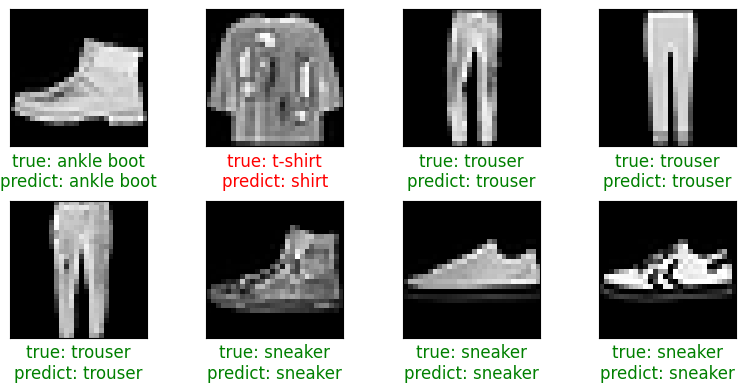

In [223]:
plot_data(X_test, y_test, y_prob)